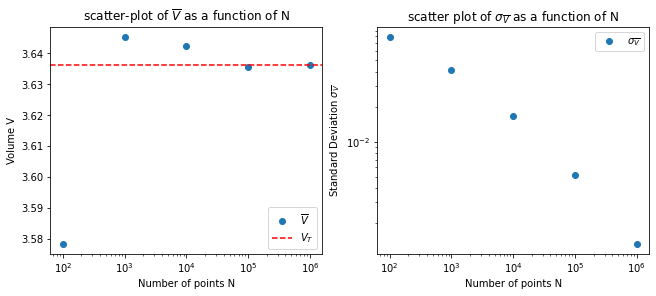

In [ ]:
# Exercise 1

# the necessary packages (matplotlib.pyplot and numpy) are imported.
import numpy as np
import matplotlib.pyplot as plt

# a function volume_MC() is defined to calculate the volume of the object.
def volume_MC(N,R,r):
    """
    This function calculates and returns the volume of the sphere hollowed out by the cylinder using the Monte Carlo method.

    Input arguments:
    N: (integer)    number of random points to be used in the Monte Carlo method.
    R: (float)      radius of the sphere.
    r: (float)      radius of the base of the cylinder inside the sphere.

    Returns:
    V: (float)      the estimated volume of the hollowed cylinder using the Monte Carlo method.
    """

    # 'V0' is defined as the volume of the cube, with side length 2R, to be evaluated.
    V0 = (2*R)**3

    # the x, y and z coordinates of N points are generated using the np.random.uniform() function:
    x = np.random.uniform(-R, R, N)
    y = np.random.uniform(-R, R, N)
    z = np.random.uniform(-R, R, N)

    # 'mask' is defined as the set of conditions for a point to be inside the hollowed out sphere.
    mask = (x**2 + y**2 + z**2 <= R**2) & (x**2 + y**2 >= r**2)

    # boolean masking is used to determine which points lie inside the object:
    x_inside = x[mask]
    y_inside = y[mask]
    z_inside = z[mask]

    # 'n' is defined as the number of points inside the object.
    n = len(x_inside)

    # the estimated volume V is defined as the ratio of points inside the object to the total amount of points, multiplied by the total cube volume.
    V = (n/N)*V0

    # the estimated volume V is returned.
    return V

# 'R' and 'r' are defined as 1 and 0.3.
R = 1
r = 0.3

# an array containing 5 x 10 dimensions is created.
array1 = np.zeros((5,10))

# using for loops, each row in 'array1' is filled with 10 outputs of volume_MC() for N = 10^2, 10^3, 10^4, 10^5 and 10^6.
for i in range(len(array1)):
    for j in range(len(array1[0])):
        array1[i][j] = volume_MC(10**(i+3),R,r)

# V_average and standard_deviation are defined as arrays with 5 elements (same number of rows as array1) in 1 row.
V_average = np.zeros(len(array1))
standard_deviation = np.zeros(len(array1))

# a for loop iterates over the rows of array1, assigning the average and standard deviation value of each such row to each element in V_average and standard_deviation.
for i in range(len(array1)):
    V_average[i] = np.mean(array1[i])
    standard_deviation[i] = np.std(array1[i])

# two side-by-side subplots are created.
fig, ax = plt.subplots(1,2, figsize=(9,4), constrained_layout=True)

# the theoretical value of V is calculated and assigned to 'V_theoretical'.
V_theoretical = (4/3)*np.pi*((R**2 - r**2)**(3/2))

# 'num_points' is set to the logspace of 10^2 to 10^6.
num_points = np.logspace(2,6, num=5, dtype=int)

# in subplot 1, the average volume is plotted for exponentially increasing values of N.
ax[0].scatter(num_points,V_average, label=r"$\overline{V}$")

# the x axis is set to a log scale, and x and y labels, a legend, a title, and a horizontal line of V_theoretical is added.
ax[0].set_xscale('log')
ax[0].set_xlabel('Number of points N')
ax[0].set_ylabel('Volume V')
ax[0].axhline(V_theoretical, color='red', linestyle='--', label=r'$V_T$')
ax[0].legend()
ax[0].set_title(r'scatter-plot of $\overline{V}$ as a function of N')

# in subplot 2, the standard deviation is plotted for exponentially increasing values of N.
ax[1].scatter(num_points,standard_deviation, label=r"$\sigma_\overline{V}$")

# the x and y axes are set to log scales, and x and y labels, a legend, a title, and a horizontal line of V_theoretical is added.
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Number of points N')
ax[1].set_ylabel(r'Standard Deviation $\sigma_\overline{V}$')
ax[1].legend()
ax[1]. set_title(r'scatter plot of $\sigma_\overline{V}$ as a function of N')

# the two subplots are presented
plt.show()


In the left plot, as N increases, the value/coordinate of the volume V is generally closer to the theretically accurate value of the volume. This means that by increasing N, the obtained value of V is more accurate.

In the right plot, the value of the standard deviation decreases as the number of points N increases, meaning that the "error" in the obtained values of the volume decreases as N increases. This further confirms the conclusion on the first plot.

Final position: ( 5 , 5 )


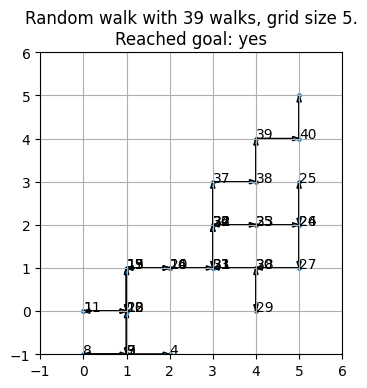

In [ ]:
# Exercise 2

# the necessary packages are imported:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rnd

# variable 'new_line' is defined as the string '\n' to add new lines in an f-string.
new_line = '\n'

# function random_walk() is defined to generate a path of random walks.
def random_walk(x0y0, dest, max_steps, gridbound):
    """
    Input:
    x0y0 - tuple (x0,y0) of starting position coords
    dest - tuple (x,y) of destination position coords
    max_steps - maximum number of steps
    gridbound - size of the grid (assumed to be square)

    Output:
    returns x, y - final position coords for a random path
    """
    # the four possible steps are defined as a tuple:
    steps = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    x = [x0y0[0]]   # initialize the x-coordinate list with the defined starting position.
    y = [x0y0[1]]   # initialize the y-coordinate list with the defined starting position.

    # i is initially set to zero
    i = 0

    # a while loop is created to determine when the max number of steps or destination is reached.
    while i < max_steps and (x[-1] != dest[0] or y[-1] != dest[1]):
        # one of the four possible steps is chosen randomly
        step = rnd.randint(0, 4)
        step = steps[step]
        # an if statement checks if the new position is within the boundaries.
        if abs(x[-1] + step[0]) <= gridbound and abs(y[-1] + step[1]) <= gridbound:
            # if so, the coordinates are appended to x and y.
            x.append(x[-1] + step[0])
            y.append(y[-1] + step[1])
            i += 1  # i is increased by one.

    # the random walk is plotted:
    plt.figure(dpi=100)
    plt.axis('square')
    plt.xlim([-1,gridbound+1])
    plt.ylim([-1,gridbound+1])
    plt.scatter(x, y, s=6)  # the scatter plot of all points in each position is plotted.
    plt.grid()

    # a for loop adds arrows in the direction of movement of the random walks and annotates steps.
    for i in range(len(x)-1):
        plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i],
                  length_includes_head=True, head_width=0.1)
        plt.annotate(str(i+1), (x[i], y[i]))
    # a title indicating the number of steps and the completion of the goal is added.
    if x[-1] == dest[0] and y[-1] == dest[1]:
        plt.title(f"Random walk with {str(i)} walks, grid size {str(gridbound)}.{new_line}Reached goal: yes")
    else:
        plt.title(f"Random walk with {str(i)} walks, grid size {str(gridbound)}.{new_line}Reached goal: no")
    # teh final position of the random walk is returned.
    return x[-1], y[-1]

# example usage
x, y = random_walk((0, 0), (5, 5), 100, 5)
print('Final position:','(', x, ',', y, ')')
